# Genshin Artifact Scouter (GAS) Binder Demonstration
This Jupyter script serves as a demonstration of Genshin Artifact Scouter (GAS) capabilities. This demonstration is built to run on [BinderHub deployeded by OVH](https://ovh.mybinder.org/). The binder for this repository can be accessed [here](https://mybinder.org/v2/gh/ScottNealon/Genshin-Artifact-Scouter/HEAD?filepath=BinderDemonstration.ipynb). This is a free, cloud based computation service with limited computational resources. GAS is computationally expensive tool, making it ill-suited for hosting on such a service. Run times on this service are not a good indication of GAS performance, clocking in at around 5 times longer than my personal computer. To fully utilize GAS, please follow the instructions at [the Genshin Artifact Scouter GitHub](https://github.com/ScottNealon/Genshin-Artifact-Scouter) to download and run GAS on your local computer.

To run this notepad on Binder, press "▶Run" above to run individual cells or "▶▶" to run all cells.

## Imports and Logging
The following lines of code imports the necessary tools to run and log GAS. The code will output results to both the on screen console as well as to an "output.log" file in the current directory. If you do not want to output to file, add a # on the `logging.FileHandler(...)` line below. Additionaly, the first time this code is run, it will download additional data [Dimbreath's GenshinData GitHub Repository](https://github.com/Dimbreath/GenshinData) for calculating character skills.

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

import logging
logging.basicConfig(level=logging.INFO, format="%(message)s", handlers=[logging.StreamHandler()])

import src as GAS

## Import Data from Genshin Optimizer
This code was designed to function as an offshoot of the great [Genshin Optimizer Tool by Frzyc](https://frzyc.github.io/genshin-optimizer/). GAS automatically imports characters, weapons, and artifacts straight from GO data. I have provided a sample database at `./data/sample_go_data.json` which will serve as the default data location to serve as a demonstration of GAS functionality.

In [8]:
genshin_optimizer_data = GAS.GenshinOptimizerData("./data/sample_go_data.json")

--------------------------------------------------------------------------------------------------------------------------------------------
READING GENSHIN OPTIMIZER DATA FROM ./data/sample_go_data.json...
Characters imported successfully.
Artifacts imported successfully.



## Run Analysis
GAS analyzes artifacts by evaluating their potential on a specific character. 

The first demonstration evaluates the potential of different 5* Pale Flame Plumes on Eula equipped with a R5 Serpent Spine, 3 other Pale Flame artifacts, and a Crimson Witch Goblet. Eula's `character_dmg_type` is set to `Physical` and her scaling stat is set to `ATK`. A 15% Crit Rate% `character_passive` is added to Eula to represent the bonus from Cryo Resonance against enemies affected by Cryo. No `character_stat_transfer` is provided as Eula is not a dual scaling character. A 50% DMG% `weapon_passive` is added to represent the 50% DMG Bonus caused by 5 stacks of Serpent Spine's passive at R5. `slots` is set to only evaluate her Plume.

The second demonstration evalutes the potential of different 5* Maiden's Beloved ATK% Sands on Qiqi equipped with a R1 Favonious Sword, 1 other Madien's Beloved artifact, 2 other Glaidators Finale Artifacts, and a Blizzard Strayer Circlet. Qiqi's `character_dmg_type` type is set to `Healing` and her scaling stat is set to `ATK`. A 20% Healing Bonus `character_passive` is added to represent Qiqi's A1 Ascension passive. No `character_stat_transfer` is provided as Eula is not a dual scaling character. 

Feel free to modify the below demonstrations to explore GAS capabilities. Select a character by providing their name below under `character_name`. The character's level, base and ascension stats, weapon, weapon base and ascension stats, and equipped artifacts will be imported from GO data. GAS does NOT automatically import character or weapon passives. For a full explanation of the different inputs, see `./Documentation.ipynb`.

Some settings may result in significantlly more computationally difficult analyses. Here are some tips to reduce computational demand on Binder:
* Limit evaluation to a single slot at a time.
* Computational complexity it exponentially tied to the number of substats that must be evaluated. Reduce number of substats that have to be evalauted not evaluating slots with unrelated main stats such as HP Flower or DMG% Goblets, by not using the `character_stat_transfer` input, or by not using `amplifying_reaction`.
* OPTIONAL: Set `character_crits` to `hit`. This will evaluate the character without any crits, removing Crit Rate and Crit DMG from the equation. While this is inaccurate for most cases and may result in dummy data, it can greatly reduce simulation time for demonstration purposes.

If you follow these suggestion, then GAS should evaluate artifacts with 106,800 different ways to roll substat increases on a standard damage dealing and criting character, which should take around 25 seconds to complete. The second demonstration with Qiqi should take about 3 seconds to complete thanks to the reduced complexity of not evaluating crits.

--------------------------------------------------------------------------------------------------------------------------------------------
EVALUATING ARTIFACT POTENTIALS

CHARACTER: Eula, 80/90
WEAPON: Serpent Spine, 90/90
EQUIPPED ARTIFACTS:
 NAME    SLOT STARS         SET LEVEL               MAIN STAT   HP  ATK  DEF  HP% ATK% DEF%   EM  ER%  CR%  CD%
# 423  Flower 5*           Pale 20/20                HP: 4780        19   21                     22.0      13.2
# 420   Plume 5*           Pale 20/20               ATK:  311  269                18.1           11.7  3.1     
# 421   Sands 5*           Pale 20/20              ATK%: 46.6                 9.3                 4.5  6.6 18.7
# 275  Goblet 5*          Witch 20/20     Physical DMG%: 58.3  508           11.1 14.6                      7.8
# 402 Circlet 5*           Pale 20/20              ATK%: 46.6        47       9.3                13.0      13.2

EULA CURRENT STATS:
CURRENT POWER:  10,761
   Base ATK   ATK  ATK%  Total ATK  Cri

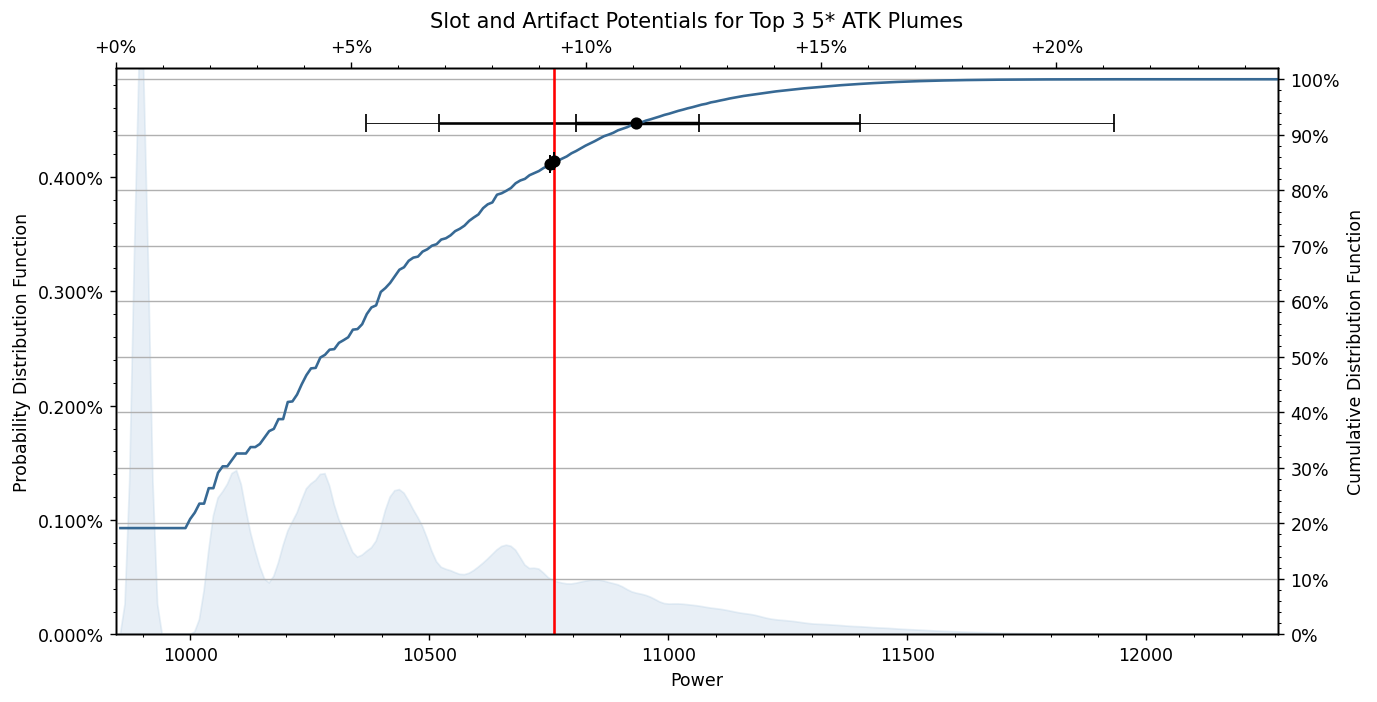

In [9]:
GAS.evaluate_character(
    genshin_optimizer_data=genshin_optimizer_data,
    character_name="Eula",
    character_dmg_type="Physical",
    character_scaling_stat="ATK",
    character_passive={"Crit Rate%": 15.0}, # Cryo Resonance
    character_stat_transfer={},
    weapon_passive={"DMG%": 50.0},  # Serpent Spine R5
    slots=[GAS.Plume], # GAS.Flower / GAS.Plume / GAS.Sands / GAS.Goblet / GAS.Circlet
)

--------------------------------------------------------------------------------------------------------------------------------------------
EVALUATING ARTIFACT POTENTIALS

CHARACTER: Qiqi, 70/80
WEAPON: Favonius Sword, 80/80
EQUIPPED ARTIFACTS:
 NAME    SLOT STARS         SET LEVEL               MAIN STAT   HP  ATK  DEF  HP% ATK% DEF%   EM  ER%  CR%  CD%
#  57  Flower 5*         Maiden 16/20                HP: 3967        45            4.7        23 11.0          
#  15   Plume 5*     Gladiators 20/20               ATK:  311             44  9.3 15.7                      6.2
# 227   Sands 5*         Maiden 16/20              ATK%: 38.7        16   44                  37       7.4     
# 280  Goblet 5*     Gladiators 20/20              ATK%: 46.6                                 51 12.3  6.6  5.4
#  19 Circlet 5*       Blizzard 17/20    Healing Bonus%: 31.3        14            8.7           18.1      13.2

QIQI CURRENT STATS:
CURRENT POWER:   3,401
   Base ATK   ATK  ATK%  Total ATK  He

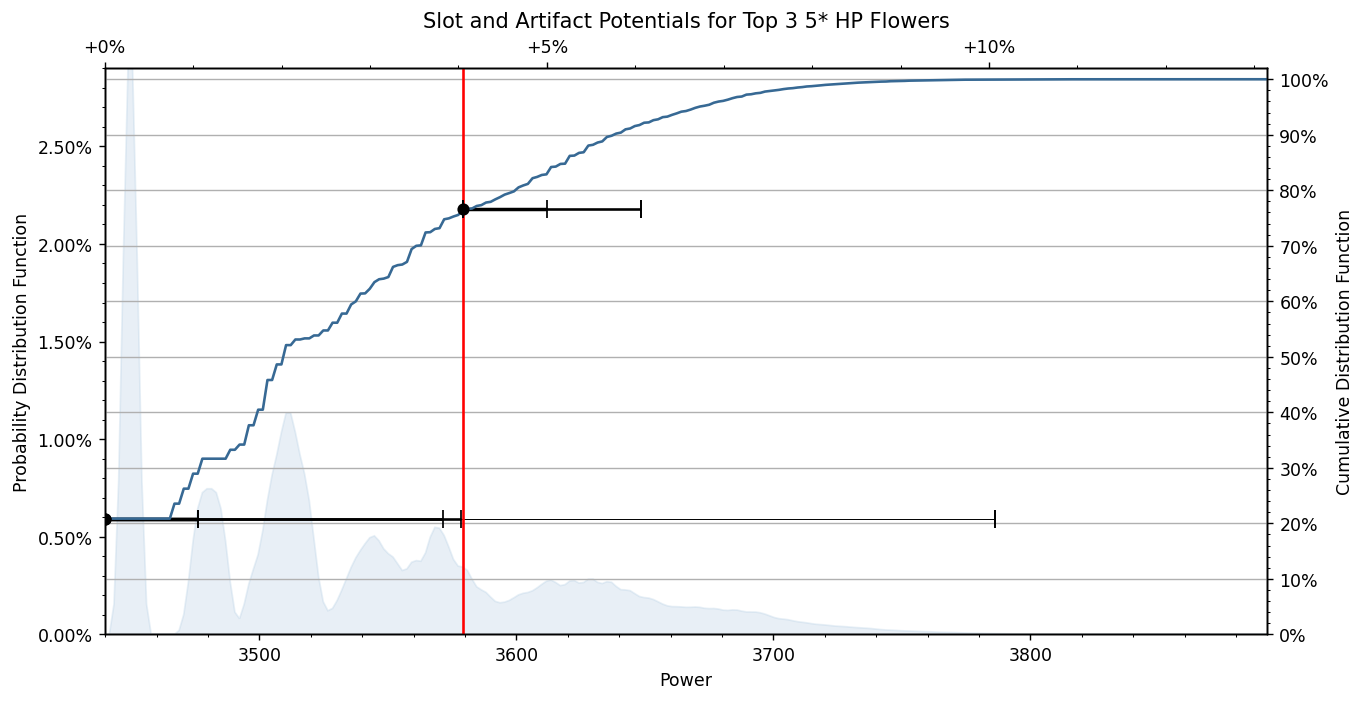

In [ ]:
GAS.evaluate_character(
    genshin_optimizer_data=genshin_optimizer_data,
    character_name="Qiqi",
    character_dmg_type="Healing",
    character_scaling_stat="ATK",
    character_passive={"Healing Bonus%": 20.0}, # A1 Passive
    character_stat_transfer={},
    character_crits="hit", # "hit" means no crits, as opposed to "avgHit" and "critHit". Qiqi's healing does not crit.
    weapon_passive={}, # Favonious Sword
    slots=[GAS.Flower], # GAS.Flower / GAS.Plume / GAS.Sands / GAS.Goblet / GAS.Circlet
)